In [4]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [3]:
!pip install mlxtend

In [6]:
df=pd.DataFrame()

In [7]:
df["X1"]=[1,2,3,4,5,6,6,7,9,9]
df["X2"]=[5,3,6,8,1,9,5,8,9,2]
df["label"]=[1,1,0,1,0,1,0,1,0,0]

In [8]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


In [9]:
import seaborn as sns

<AxesSubplot:xlabel='X1', ylabel='X2'>

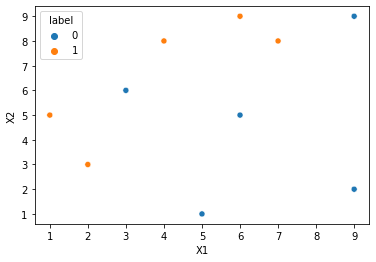

In [11]:
sns.scatterplot(x=df["X1"],y=df["X2"],hue=df["label"])

In [14]:
df.shape

(10, 3)

In [13]:
#1/no. of rows
df.shape[0]

10

In [15]:
df["sample_weights"]=1/df.shape[0]

In [16]:
df

,X1,X2,label,sample_weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [33]:
from sklearn.tree import DecisionTreeClassifier
DT1=DecisionTreeClassifier(max_depth=1)

In [34]:
X=df.iloc[:,0:2]

In [35]:
y=df.iloc[:,2]

In [36]:
X

,X1,X2
0,1,5
1,2,3
2,3,6
3,4,8
4,5,1
5,6,9
6,6,5
7,7,8
8,9,9
9,9,2


In [37]:
y

0    1
1    1
2    0
3    1
4    0
5    1
6    0
7    1
8    0
9    0
Name: label, dtype: int64

In [38]:
DT1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

In [39]:
from sklearn.tree import plot_tree

[Text(0.5, 0.75, 'X[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]')]

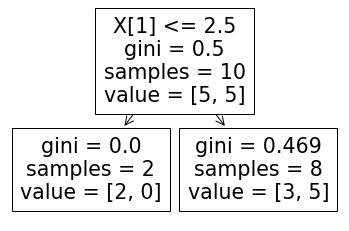

In [40]:
plot_tree(DT1)

In [41]:
np.array(X)

array([[1, 5],
       [2, 3],
       [3, 6],
       [4, 8],
       [5, 1],
       [6, 9],
       [6, 5],
       [7, 8],
       [9, 9],
       [9, 2]], dtype=int64)

C:\Users\sunny\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<AxesSubplot:>

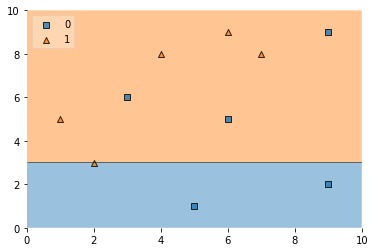

In [42]:
plot_decision_regions(np.array(X), np.array(y), clf=DT1, legend=2)

In [44]:
df['y_pred']=DT1.predict(X)

In [45]:
df

,X1,X2,label,sample_weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,1
9,9,2,0,0.1,0


In [46]:
#performance of the stump
def calculate_model_weight(error):
    return 0.5*np.log((1-error)/(error))
     

In [47]:
alpha1 = calculate_model_weight(0.3)
alpha1

0.42364893019360184

In [51]:
#calculate the updated weight

def update_row_weights(row,alpha=0.423):
    if row['label'] == row['y_pred']:
        return row['sample_weights'] * np.exp(-alpha)
    else:
        return row['sample_weights'] * np.exp(alpha)

In [52]:
df['updated_weights'] = df.apply(update_row_weights,axis=1)

In [53]:
df

,X1,X2,label,sample_weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,1,0.152653
3,4,8,1,0.1,1,0.065508
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,1,0.065508
6,6,5,0,0.1,1,0.152653
7,7,8,1,0.1,1,0.065508
8,9,9,0,0.1,1,0.152653
9,9,2,0,0.1,0,0.065508


In [54]:
df["sample_weights"].sum()

1.0

In [55]:
df["updated_weights"].sum()

0.9165153319682015

In [56]:
df['nomalized_weights'] = df['updated_weights']/df['updated_weights'].sum()

In [57]:
df

,X1,X2,label,sample_weights,y_pred,updated_weights,nomalized_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,1,0.152653,0.166559
3,4,8,1,0.1,1,0.065508,0.071475
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,1,0.065508,0.071475
6,6,5,0,0.1,1,0.152653,0.166559
7,7,8,1,0.1,1,0.065508,0.071475
8,9,9,0,0.1,1,0.152653,0.166559
9,9,2,0,0.1,0,0.065508,0.071475


In [58]:
df["nomalized_weights"].sum()

1.0

In [59]:
np.cumsum(df['nomalized_weights'])

0    0.071475
1    0.142950
2    0.309508
3    0.380983
4    0.452458
5    0.523933
6    0.690492
7    0.761967
8    0.928525
9    1.000000
Name: nomalized_weights, dtype: float64

In [61]:
df['cumsum_upper'] = np.cumsum(df['nomalized_weights'])

df['cumsum_lower'] = df['cumsum_upper'] - df['nomalized_weights']

df[['X1','X2','label','sample_weights','y_pred','updated_weights','cumsum_lower','cumsum_upper']]


,X1,X2,label,sample_weights,y_pred,updated_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.000000,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.142950
2,3,6,0,0.1,1,0.152653,0.142950,0.309508
3,4,8,1,0.1,1,0.065508,0.309508,0.380983
4,5,1,0,0.1,0,0.065508,0.380983,0.452458
5,6,9,1,0.1,1,0.065508,0.452458,0.523933
6,6,5,0,0.1,1,0.152653,0.523933,0.690492
7,7,8,1,0.1,1,0.065508,0.690492,0.761967
8,9,9,0,0.1,1,0.152653,0.761967,0.928525
9,9,2,0,0.1,0,0.065508,0.928525,1.000000


In [76]:
# i want to do random sampling for my next DT
# generating 10 random weights

indexes=[]

for i in range(df.shape[0]):
    a=np.random.random()
    for index,row in df.iterrows():
        if row['cumsum_upper']>a and a>row["cumsum_lower"]:
            indexes.append(index)
        
            

In [77]:
indexes

[8, 3, 5, 4, 9, 8, 8, 8, 2, 4]

In [80]:
second_df=df.iloc[indexes][["X1","X2","label","sample_weights"]]

In [81]:
second_df

,X1,X2,label,sample_weights
8,9,9,0,0.1
3,4,8,1,0.1
5,6,9,1,0.1
4,5,1,0,0.1
9,9,2,0,0.1
8,9,9,0,0.1
8,9,9,0,0.1
8,9,9,0,0.1
2,3,6,0,0.1
4,5,1,0,0.1


In [93]:
from sklearn.tree import DecisionTreeClassifier
DT2=DecisionTreeClassifier(max_depth=1)

In [94]:
X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

In [98]:
X

array([[9, 9],
       [4, 8],
       [6, 9],
       [5, 1],
       [9, 2],
       [9, 9],
       [9, 9],
       [9, 9],
       [3, 6],
       [5, 1]], dtype=int64)

In [95]:
DT2.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'X[0] <= 7.5\ngini = 0.32\nsamples = 10\nvalue = [8, 2]'),
 Text(0.25, 0.25, 'gini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]')]

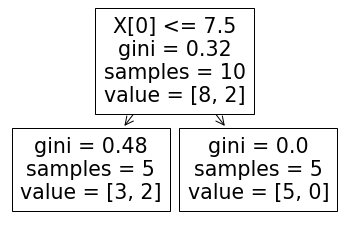

In [96]:
plot_tree(DT2)

C:\ProgramData\Anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:315: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)


<AxesSubplot:>

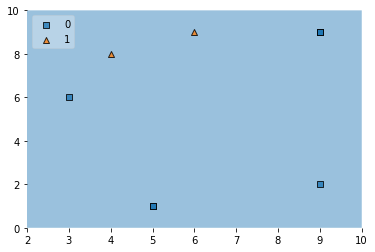

In [97]:
plot_decision_regions(X,y,clf=DT2,legend=2)

In [100]:
second_df["y_pred"]=DT2.predict(X)

In [101]:
second_df

,X1,X2,label,sample_weights,y_pred
8,9,9,0,0.1,0
3,4,8,1,0.1,0
5,6,9,1,0.1,0
4,5,1,0,0.1,0
9,9,2,0,0.1,0
8,9,9,0,0.1,0
8,9,9,0,0.1,0
8,9,9,0,0.1,0
2,3,6,0,0.1,0
4,5,1,0,0.1,0


In [102]:
alpha2 = calculate_model_weight(0.2)

In [103]:
alpha2

0.6931471805599453

In [106]:
def update_row_weights(row,alpha=0.69):
    if row['label'] == row['y_pred']:
        return row['sample_weights'] * np.exp(-alpha)
    else:
        return row['sample_weights'] * np.exp(alpha)

In [107]:
second_df['updated_weights'] = second_df.apply(update_row_weights,axis=1)

In [108]:
second_df

,X1,X2,label,sample_weights,y_pred,updated_weights
8,9,9,0,0.1,0,0.050158
3,4,8,1,0.1,0,0.199372
5,6,9,1,0.1,0,0.199372
4,5,1,0,0.1,0,0.050158
9,9,2,0,0.1,0,0.050158
8,9,9,0,0.1,0,0.050158
8,9,9,0,0.1,0,0.050158
8,9,9,0,0.1,0,0.050158
2,3,6,0,0.1,0,0.050158
4,5,1,0,0.1,0,0.050158


In [109]:
second_df['nomalized_weights'] = second_df['updated_weights']/second_df['updated_weights'].sum()

In [110]:
second_df


,X1,X2,label,sample_weights,y_pred,updated_weights,nomalized_weights
8,9,9,0,0.1,0,0.050158,0.062697
3,4,8,1,0.1,0,0.199372,0.249213
5,6,9,1,0.1,0,0.199372,0.249213
4,5,1,0,0.1,0,0.050158,0.062697
9,9,2,0,0.1,0,0.050158,0.062697
8,9,9,0,0.1,0,0.050158,0.062697
8,9,9,0,0.1,0,0.050158,0.062697
8,9,9,0,0.1,0,0.050158,0.062697
2,3,6,0,0.1,0,0.050158,0.062697
4,5,1,0,0.1,0,0.050158,0.062697


In [111]:
second_df['cumsum_upper'] = np.cumsum(second_df['nomalized_weights'])

second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['nomalized_weights']

second_df[['X1','X2','label','sample_weights','y_pred','updated_weights','cumsum_lower','cumsum_upper']]


,X1,X2,label,sample_weights,y_pred,updated_weights,cumsum_lower,cumsum_upper
8,9,9,0,0.1,0,0.050158,0.000000,0.062697
3,4,8,1,0.1,0,0.199372,0.062697,0.311910
5,6,9,1,0.1,0,0.199372,0.311910,0.561123
4,5,1,0,0.1,0,0.050158,0.561123,0.623820
9,9,2,0,0.1,0,0.050158,0.623820,0.686517
8,9,9,0,0.1,0,0.050158,0.686517,0.749213
8,9,9,0,0.1,0,0.050158,0.749213,0.811910
8,9,9,0,0.1,0,0.050158,0.811910,0.874607
2,3,6,0,0.1,0,0.050158,0.874607,0.937303
4,5,1,0,0.1,0,0.050158,0.937303,1.000000


In [114]:
# i want to do random sampling for my next DT
# generating 10 random weights

indexes=[]

for i in range(second_df.shape[0]):
    a=np.random.random()
    for index,row in second_df.iterrows():
        if row['cumsum_upper']>a and a>row["cumsum_lower"]:
            indexes.append(index)
        
            

In [115]:
indexes

[3, 8, 5, 9, 8, 2, 5, 8, 4, 5]

In [117]:
third_df=second_df.iloc[indexes]

In [118]:
third_df

,X1,X2,label,sample_weights,y_pred,updated_weights,nomalized_weights,cumsum_upper,cumsum_lower
4,5,1,0,0.1,0,0.050158,0.062697,0.623820,0.561123
2,3,6,0,0.1,0,0.050158,0.062697,0.937303,0.874607
8,9,9,0,0.1,0,0.050158,0.062697,0.749213,0.686517
4,5,1,0,0.1,0,0.050158,0.062697,1.000000,0.937303
2,3,6,0,0.1,0,0.050158,0.062697,0.937303,0.874607
5,6,9,1,0.1,0,0.199372,0.249213,0.561123,0.311910
8,9,9,0,0.1,0,0.050158,0.062697,0.749213,0.686517
2,3,6,0,0.1,0,0.050158,0.062697,0.937303,0.874607
9,9,2,0,0.1,0,0.050158,0.062697,0.686517,0.623820
8,9,9,0,0.1,0,0.050158,0.062697,0.749213,0.686517


In [119]:
#final prediction

# additive modeling

## final_prediction=alpha1*DT1+alpha2*DT2

In [121]:
print(alpha1, alpha2)

0.42364893019360184 0.6931471805599453


In [125]:
query=np.array([[5,1]])

In [126]:
DT1.predict(query)

C:\Users\sunny\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [127]:
DT2.predict(query)

array([0], dtype=int64)

In [129]:
f=alpha1*(-1)+alpha2*(-1)

In [131]:
final_prd=np.sign(f)

In [132]:
final_prd

-1.0

In [133]:
query2=np.array([[6,9]])

In [134]:
DT1.predict(query2)

C:\Users\sunny\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [135]:
DT2.predict(query2)

array([0], dtype=int64)

In [136]:
f2=alpha1*(1)+alpha2*(-1)

In [138]:
f2

-0.26949825036634345

In [139]:
np.sign(f2)

-1.0